/home/dev/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


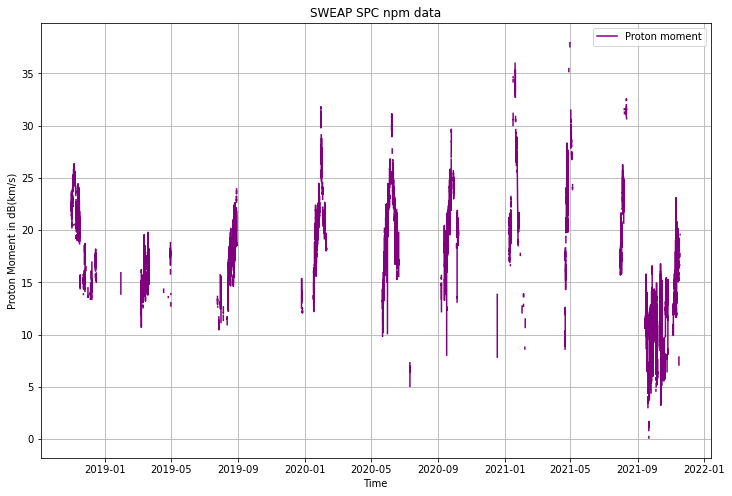

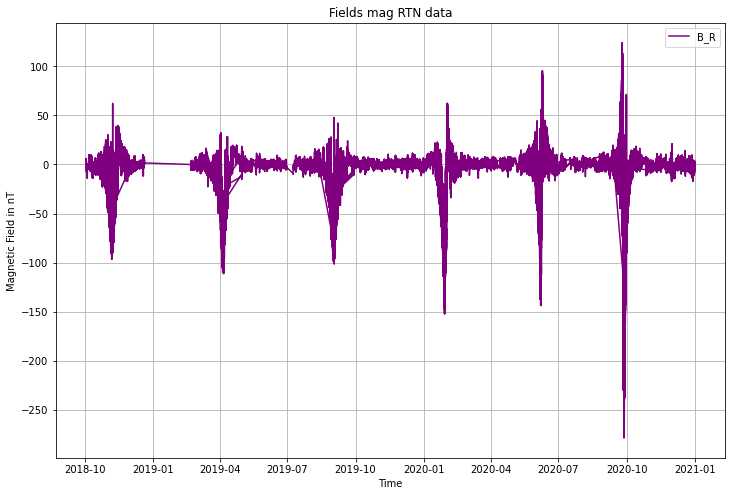

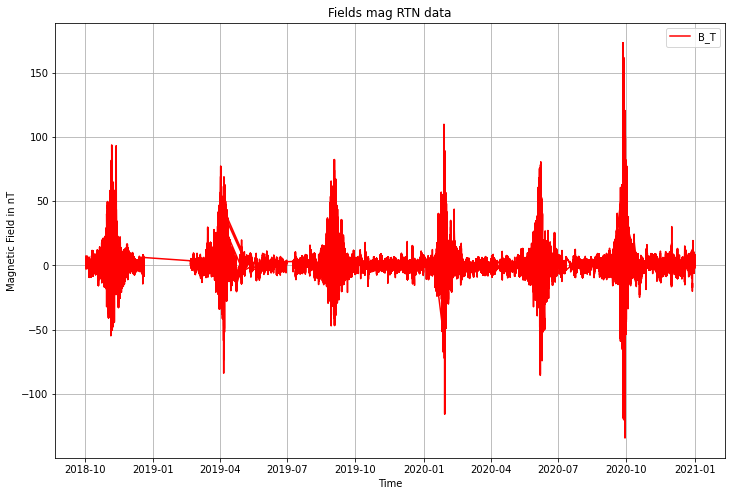

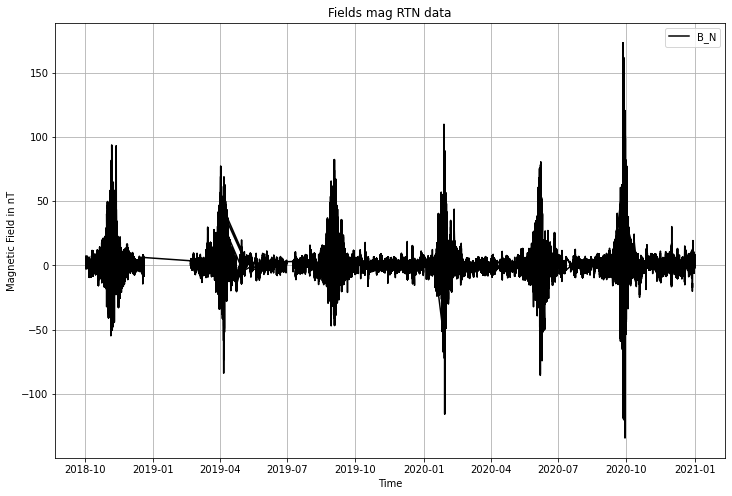

In [4]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri Jan 13 14:12:30 2023

@author: Harsha

"""
## psp data analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import glob
#from multiprocessing import cpu_count
#from multiprocessing.pool import ThreadPool
#import multiprocessing as mp


directory = '/home/dev/PSP/'
f1 = 'mag_RTN_2018-2020.csv'
f2 = 'npm_data_2018-2020.csv'

mag_RTN = pd.read_csv(directory+f1)
del mag_RTN['Unnamed: 0'], mag_RTN['np_moment']
npm_data = pd.read_csv(directory+f2)



# NUll/NaN removal
null_indx = npm_data.loc[npm_data['Time']=='0'].index
new_df = npm_data.drop(labels=null_indx, axis=0)

time = new_df["Time"].to_numpy()
npm = new_df["np_moment"].to_numpy()
npm_data = pd.DataFrame({'Time': time, 'np_moment':npm})

null_indx = mag_RTN.loc[mag_RTN['Time']=='0'].index
new_df = mag_RTN.drop(labels=null_indx, axis=0)

time = new_df["Time"].to_numpy()
B_R = new_df["B_R"].to_numpy()
B_T = new_df["B_T"].to_numpy()
B_N = new_df["B_N"].to_numpy()
mag_RTN = pd.DataFrame({'Time': time, 'B_R':B_R, 'B_T':B_T, 'B_N':B_N})

mag_RTN['Time'] = pd.to_datetime(mag_RTN.Time[:])
npm_data['Time'] = pd.to_datetime(npm_data.Time[:])
mag_RTN2 = mag_RTN
npm_data2 = npm_data

npm_data2.set_index('Time',inplace=True)
mag_RTN2.set_index('Time',inplace=True)

#fig, ax = plt.subplots(figsize=(12, 8))
#ax.plot(npm_data.Time,10*np.log10(npm_data.np_moment),'o',color='purple')
#ax.set(xlabel="Time", ylabel="Proton Moment in dB(km/s)",
#       title="SWEAP SPC npm data")
#locator = mdates.AutoDateLocator()
#formatter = mdates.ConciseDateFormatter(locator)
#formatter.formats = ['%m-%y',  # ticks are mostly years
#                     '%m',       # ticks are mostly months
#                     '%d',       # ticks are mostly days
#                     '%H:%M',    # hrs
#                     '%H:%M:%S',    # min
#                     '%S.%f', ]  # secs
## these are mostly just the level above...
#formatter.zero_formats = [''] + formatter.formats[:-1]
## ...except for ticks that are mostly hours, then it is nice to have
## month-day:
##formatter.zero_formats[3] = '%d-%b'
#formatter.zero_formats[3] = '%m %y'
#
##formatter.offset_formats = ['',
##                            '%Y',
##                            '%b %Y',
##                            '%d %b %Y',
##                            '%d %b %Y',
##                            '%d %b %Y %H:%b', ]
#
#formatter.offset_formats = ['%m %Y']
#ax.xaxis.set_major_locator(locator)
#ax.xaxis.set_major_formatter(formatter)
#ax.grid()
#
#
#plt.show()
#
#fig, ax = plt.subplots(figsize=(12, 8))
#ax.plot(mag_RTN.Time,mag_RTN.B_R,'o',color='purple',label='B_R')
#ax.plot(mag_RTN.Time,mag_RTN.B_T,'o',color='red',label='B_R')
#ax.plot(mag_RTN.Time,mag_RTN.B_N,'o',color='black',label='B_R')
#ax.set(xlabel="Time", ylabel="Magnetic Field in nT",
#       title="Fields mag RTN data")
#locator = mdates.AutoDateLocator()
#formatter = mdates.ConciseDateFormatter(locator)
#formatter.formats = ['%y',  # ticks are mostly years
#                     '%b',       # ticks are mostly months
#                     '%d',       # ticks are mostly days
#                     '%H:%b',    # hrs
#                     '%H:%b',    # min
#                     '%S.%f', ]  # secs
## these are mostly just the level above...
#formatter.zero_formats = [''] + formatter.formats[:-1]
## ...except for ticks that are mostly hours, then it is nice to have
## month-day:
#formatter.zero_formats[3] = '%d-%b'
#
#formatter.offset_formats = ['',
#                            '%Y',
#                            '%b %Y',
#                            '%d %b %Y',
#                            '%d %b %Y',
#                            '%d %b %Y %H:%b', ]
#ax.xaxis.set_major_locator(locator)
#ax.xaxis.set_major_formatter(formatter)
#ax.grid()

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(10*np.log10(npm_data2.np_moment),color='purple',label='Proton moment')
ax.set(xlabel="Time", ylabel="Proton Moment in dB(km/s)",
       title="SWEAP SPC npm data")
ax.legend()
ax.grid()

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(mag_RTN2.B_R,color='purple',label='B_R')
ax.set(xlabel="Time", ylabel="Magnetic Field in nT",
       title="Fields mag RTN data")
ax.legend()
ax.grid()

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(mag_RTN2.B_T,color='red',label='B_T')
ax.set(xlabel="Time", ylabel="Magnetic Field in nT",
       title="Fields mag RTN data")
ax.legend()
ax.grid()

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(mag_RTN2.B_N,color='black',label='B_N')
ax.set(xlabel="Time", ylabel="Magnetic Field in nT",
       title="Fields mag RTN data")
ax.legend()
ax.grid()

plt.show()